- Leer los diferentes pagos
- ver gastos totales por pago
- relacionar pagos con entidades
- ver entidades con mas gastos/ingresos
- etc

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
input_files_path = './input'
files = os.listdir(input_files_path)

for file in files:
    if os.path.isfile(os.path.join(input_files_path, file)):
        if 'payment' in file:
            path = os.path.join(input_files_path, file)
            entities = pd.read_csv(path)
            amount = entities.amount.sum()
            if amount != 0.0:
                print('total amount for ', file, amount)

total amount for  payment_trimloc2017-anexo5_Capitulo2.csv 1038.1399999999999
total amount for  payment_trimloc2017-anexo5_Capitulo4.csv 875696.53
total amount for  payment_trimloc2017-anexo5_Capitulo6.csv 113.5
total amount for  payment_trimloc2017-anexo5_Capitulo8.csv 95944.02
total amount for  payment_trimloc2017-econ-gast-importes_EstimacionCreditosDefinitivosAFinEjercicioCorriente.csv 378481403.2600001
total amount for  payment_trimloc2017-econ-gast-importes_EstimacionObligacionesReconocidasNetasA31Del12.csv 375702492.11000013
total amount for  payment_trimloc2017-econ-gast-importes_ObligacionesReconocidasDelEjercicioCorriente.csv 25892861.080000002
total amount for  payment_trimloc2017-econ-gast-importes_PagosLiquidosDeEjerciciosCerrados.csv 19449643.770000003
total amount for  payment_trimloc2017-econ-gast-importes_PagosRealizadosDelEjercicioCorriente.csv 25640767.790000003
total amount for  payment_trimloc2017-econ-ingr-importes_DerechosReconocidosDelEjercicioCorriente.csv 5397

In [3]:
entities = pd.read_csv('./input/entities.csv')
entities.describe()

,id,entity,period,explicit_member,typed_member,dimension,typed_member_value
count,1049,1049,1049,738,310,1048,310
unique,1049,1,1,738,5,10,303
top,IdContextoDatosBasicos,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-econ-ingr-cuentas:EconomicaIngresos,trimloc2017-anexo5:Filasdimension,trimloc2017-econ-gast:Cuentasdimension,Primer aval
freq,1,1049,1049,1,300,372,4


In [4]:
entities['typed_member'].unique()

array([nan,
       'trimloc2017-anexo4:AvalesEjecutadosClasificacionEconomicaDeGastosDimensionDeFilas',
       'trimloc2017-anexo4:AvalesReintegradosClasificacionEconomicaDeIngresosDimensionDeFilas',
       'trimloc2017-anexo4:AvalesEjecutadosConceptosNoPresupuestariosDimensionDeFilas',
       'trimloc2017-anexo4:AvalesReintegradosConceptosNoPresupuestariosDimensionDeFilas',
       'trimloc2017-anexo5:Filasdimension'], dtype=object)

In [5]:
anexo5_Capitulo2 = pd.read_csv('./input/payment_trimloc2017-anexo5_Capitulo2.csv', index_col=0)
anexo5_Capitulo2 = anexo5_Capitulo2[anexo5_Capitulo2.amount != 0.0]
anexo5_Capitulo2.head()

,decimals,reference,currency,amount
0,0,IdContextosAnexo5_Transferencia1,euro,10.79
2,0,IdContextosAnexo5_Transferencia3,euro,776.21
5,0,IdContextosAnexo5_Transferencia6,euro,96.60
6,0,IdContextosAnexo5_Transferencia7,euro,154.54


In [6]:
anexo5_Capitulo2.describe()

,decimals,amount
count,4.0,4.000000
mean,0.0,259.535000
std,0.0,349.475271
min,0.0,10.790000
25%,0.0,75.147500
50%,0.0,125.570000
75%,0.0,309.957500
max,0.0,776.210000


In [7]:
EstimacionCreditosDefinitivosAFinEjercicioCorriente = pd.read_csv('./input/payment_trimloc2017-econ-gast-importes_EstimacionCreditosDefinitivosAFinEjercicioCorriente.csv', index_col=0)
EstimacionCreditosDefinitivosAFinEjercicioCorriente = EstimacionCreditosDefinitivosAFinEjercicioCorriente[EstimacionCreditosDefinitivosAFinEjercicioCorriente.amount != 0.0]
EstimacionCreditosDefinitivosAFinEjercicioCorriente.head()

,decimals,reference,currency,amount
0,2,IdContextosEconomicaGastos_OrganosDeGobiernoYP...,euro,993006.93
1,2,IdContextosEconomicaGastos_RetribucionesBasica...,euro,993006.93
2,2,IdContextosEconomicaGastos_OrganosDeGobiernoYP...,euro,993006.93
3,2,IdContextosEconomicaGastos_PersonalEventual_Re...,euro,101119.27
4,2,IdContextosEconomicaGastos_PersonalEventual_Re...,euro,156655.90


In [8]:
EstimacionCreditosDefinitivosAFinEjercicioCorriente.describe()

,decimals,amount
count,167.0,1.670000e+02
mean,2.0,2.266356e+06
std,0.0,5.809076e+06
min,2.0,7.000000e+02
25%,2.0,4.948985e+04
50%,2.0,2.139179e+05
75%,2.0,1.074776e+06
max,2.0,3.533054e+07


In [9]:
reference = EstimacionCreditosDefinitivosAFinEjercicioCorriente.reference[0]

In [10]:
entities[entities.id == reference]

,id,entity,period,explicit_member,typed_member,dimension,typed_member_value
573,IdContextosEconomicaGastos_OrganosDeGobiernoYP...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-econ-gast-cuentas:OrganosDeGobiern...,NaN,trimloc2017-econ-gast:Cuentasdimension,NaN


In [11]:
merged = EstimacionCreditosDefinitivosAFinEjercicioCorriente.merge(entities, right_on='id', left_on='reference')
merged.head()

,decimals,reference,currency,amount,id,entity,period,explicit_member,typed_member,dimension,typed_member_value
0,2,IdContextosEconomicaGastos_OrganosDeGobiernoYP...,euro,993006.93,IdContextosEconomicaGastos_OrganosDeGobiernoYP...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-econ-gast-cuentas:OrganosDeGobiern...,NaN,trimloc2017-econ-gast:Cuentasdimension,NaN
1,2,IdContextosEconomicaGastos_RetribucionesBasica...,euro,993006.93,IdContextosEconomicaGastos_RetribucionesBasica...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-econ-gast-cuentas:RetribucionesBas...,NaN,trimloc2017-econ-gast:Cuentasdimension,NaN
2,2,IdContextosEconomicaGastos_OrganosDeGobiernoYP...,euro,993006.93,IdContextosEconomicaGastos_OrganosDeGobiernoYP...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-econ-gast-cuentas:OrganosDeGobiern...,NaN,trimloc2017-econ-gast:Cuentasdimension,NaN
3,2,IdContextosEconomicaGastos_PersonalEventual_Re...,euro,101119.27,IdContextosEconomicaGastos_PersonalEventual_Re...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-econ-gast-cuentas:PersonalEventual...,NaN,trimloc2017-econ-gast:Cuentasdimension,NaN
4,2,IdContextosEconomicaGastos_PersonalEventual_Re...,euro,156655.90,IdContextosEconomicaGastos_PersonalEventual_Re...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-econ-gast-cuentas:PersonalEventual...,NaN,trimloc2017-econ-gast:Cuentasdimension,NaN


In [12]:
all_payments = None
for file in files:
    if os.path.isfile(os.path.join(input_files_path, file)):
        if 'payment_' in file:
            path = os.path.join(input_files_path, file)
            payments = pd.read_csv(path, index_col=0)
            merged = payments.merge(entities, right_on='id', left_on='reference', how='left')

            if all_payments is None:
                all_payments = merged
            else:
                all_payments = pd.concat([all_payments, merged])

all_payments

,decimals,reference,currency,amount,id,entity,period,explicit_member,typed_member,dimension,typed_member_value
0,2,IdContextosAnexo1_InteresesDeDeudaPublica,euro,0.00,IdContextosAnexo1_InteresesDeDeudaPublica,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:InteresesDeDeudaPublica,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
1,2,IdContextosAnexo1_InteresesDePrestamosYOtrasOp...,euro,0.00,IdContextosAnexo1_InteresesDePrestamosYOtrasOp...,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:InteresesDePrestamosYOtrasO...,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
2,2,IdContextosAnexo1_InteresesDeDepositosYFianzas,euro,0.00,IdContextosAnexo1_InteresesDeDepositosYFianzas,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:InteresesDeDepositosYFianzas,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
3,2,IdContextosAnexo1_OtrosIntereses352y358,euro,0.00,IdContextosAnexo1_OtrosIntereses352y358,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:OtrosIntereses352y358,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
4,2,IdContextosAnexo1_EjecucionDeAvales357,euro,0.00,IdContextosAnexo1_EjecucionDeAvales357,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-anexo1:EjecucionDeAvales357,NaN,trimloc2017-anexo1:Conceptosdimension,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14,2,R42,euro,1776599.45,R42,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-remt:ExcesoDeFinanciacionAfectada,NaN,trimloc2017-remt:FilasdeRemanentedeTesoreriadi...,NaN
15,2,R49t,euro,63588850.58,R49t,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-remt:RemanenteDeTesoreriaParaGasto...,NaN,trimloc2017-remt:FilasdeRemanentedeTesoreriadi...,NaN
16,2,R59t,euro,210410.12,R59t,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-remt:SaldoDeObligacionesPendientes...,NaN,trimloc2017-remt:FilasdeRemanentedeTesoreriadi...,NaN
17,2,R69t,euro,131.25,R69t,EXCMA.DIPUTACION PROVINCIAL TERUEL,2021-03-31,trimloc2017-remt:SaldoDeObligacionesPorDevoluc...,NaN,trimloc2017-remt:FilasdeRemanentedeTesoreriadi...,NaN


In [13]:
all_payments.id.describe()

count                                                  1629
unique                                                  294
top       IdContextosEconomicaGastos_TransferenciasCorri...
freq                                                      6
Name: id, dtype: object

In [14]:
all_payments.amount.sum()


2095730562.7099998

In [15]:
all_payments.to_csv('output/all_payments.csv')

In [16]:
group_payments = all_payments[all_payments.amount != 0.0] # remove before sum to avoid errors
group_payments = group_payments.groupby('id').sum()
group_payments = group_payments.sort_values(by='amount', ascending=False)

In [17]:
group_payments.to_csv('output/payments_group_by_id.csv', index_label='index')

<AxesSubplot:xlabel='amount', ylabel='id'>

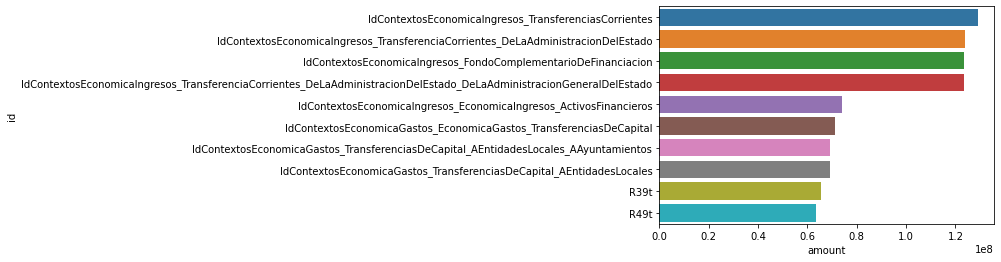

In [18]:
top_10_payments = group_payments.head(10)
sns.barplot(x=top_10_payments['amount'], y=top_10_payments.index)

<AxesSubplot:xlabel='amount', ylabel='id'>

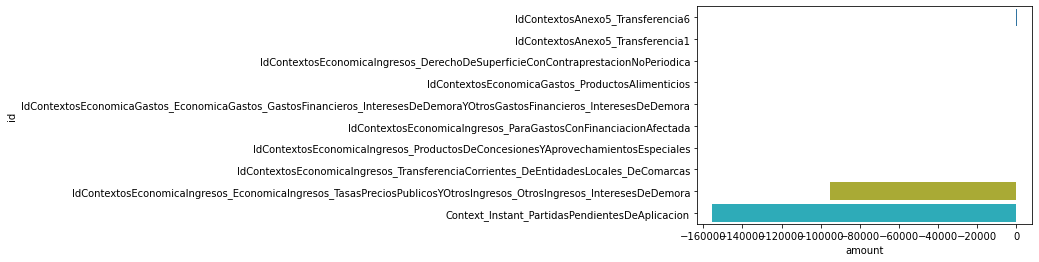

In [19]:
botton_10_payments = group_payments.tail(10)
sns.barplot(x=botton_10_payments['amount'], y=botton_10_payments.index)

In [20]:
group_payments_without_empties = group_payments[group_payments.amount != 0.0]
group_payments_without_empties.shape
# group_payments.shape

(284, 2)

<AxesSubplot:xlabel='amount', ylabel='id'>

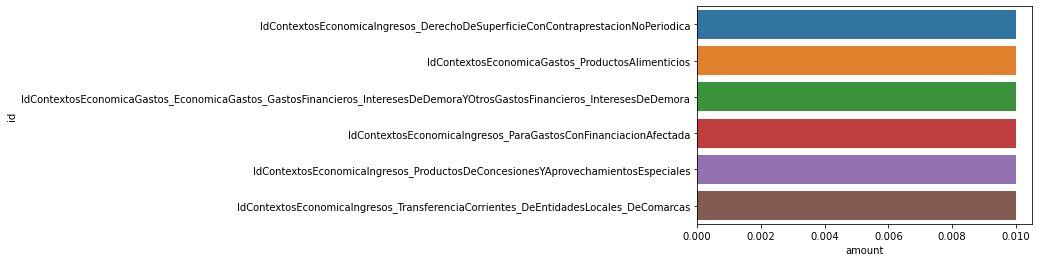

In [21]:
botton_10_payments = group_payments_without_empties[:-2].tail(6)
sns.barplot(x=botton_10_payments['amount'], y=botton_10_payments.index)

In [22]:
botton_10_payments

,decimals,amount
id,,
IdContextosEconomicaIngresos_DerechoDeSuperficieConContraprestacionNoPeriodica,4,0.01
IdContextosEconomicaGastos_ProductosAlimenticios,4,0.01
IdContextosEconomicaGastos_EconomicaGastos_GastosFinancieros_InteresesDeDemoraYOtrosGastosFinancieros_InteresesDeDemora,4,0.01
IdContextosEconomicaIngresos_ParaGastosConFinanciacionAfectada,4,0.01
IdContextosEconomicaIngresos_ProductosDeConcesionesYAprovechamientosEspeciales,4,0.01
IdContextosEconomicaIngresos_TransferenciaCorrientes_DeEntidadesLocales_DeComarcas,4,0.01


<AxesSubplot:xlabel='amount', ylabel='id'>

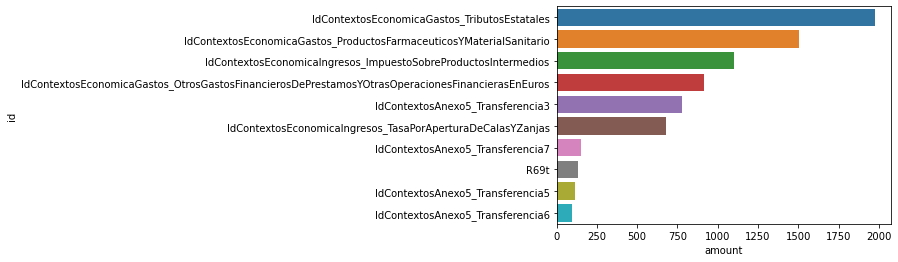

In [23]:
botton_10_payments = group_payments_without_empties[:-9].tail(10)
sns.barplot(x=botton_10_payments['amount'], y=botton_10_payments.index)

In [24]:
group_payments_without_empties[group_payments_without_empties.amount == 0.01]

,decimals,amount
id,,
IdContextosEconomicaIngresos_DerechoDeSuperficieConContraprestacionNoPeriodica,4,0.01
IdContextosEconomicaGastos_ProductosAlimenticios,4,0.01
IdContextosEconomicaGastos_EconomicaGastos_GastosFinancieros_InteresesDeDemoraYOtrosGastosFinancieros_InteresesDeDemora,4,0.01
IdContextosEconomicaIngresos_ParaGastosConFinanciacionAfectada,4,0.01
IdContextosEconomicaIngresos_ProductosDeConcesionesYAprovechamientosEspeciales,4,0.01
IdContextosEconomicaIngresos_TransferenciaCorrientes_DeEntidadesLocales_DeComarcas,4,0.01
